In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import utilities as ut
from utilities.constant import pc_per_cm, kpc_per_cm

In [2]:
def plot2d(x, y, value, cmap = 'viridis', norm = None, vmin = None, vmax = None, **kwargs):
    counts, xbins, ybins = np.histogram2d(x, y, **kwargs)
    sums, _, _ = np.histogram2d(x, y, weights = value, **kwargs)

    with np.errstate(divide='ignore', invalid='ignore'):  # suppress possible divide-by-zero warnings
        plot = plt.pcolormesh(ybins, xbins, sums / counts, cmap = cmap, norm = norm, vmin = vmin, vmax = vmax)

    return plot

### shattering plots

In [ ]:
# plot binsize
binsize_plot = plot2d(halo_gas['dist_x'], halo_gas['dist_y'], value = halo_gas['smoothing_len'], cmap = 'viridis_r', bins = [150,150])

plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]')
plt.axis('equal')
plt.colorbar(binsize_plot, label = 'smoothing length [ckpc/h]')
plt.title('m12f')

### more plotting

In [3]:
sim_name_1 = 'm12b_res7100'
sim_name_2 = 'm12f_res7100'

r1 = 335.0983
r2 = 354.6581

In [4]:
f = np.load(f'../outputs/{sim_name_2}/col_dens0.npy')

In [7]:
data_type = 'time'

# load data
rot0_1 = np.load(f'../outputs/{sim_name_1}/{data_type}_theta0.npy')
rot90_1 = np.load(f'../outputs/{sim_name_1}/{data_type}_theta90.npy')

rot0_2 = np.load(f'../outputs/{sim_name_2}/{data_type}_theta0.npy')
rot90_2 = np.load(f'../outputs/{sim_name_2}/{data_type}_theta90.npy')

numrays_1 = len(np.arange(-r1,r1, 1))
numrays_2 = len(np.arange(-r2,r2, 1))
# make x and y coordinates
coords_1 = np.arange(-r1,r1, 1)
x1 = np.repeat(coords_1, numrays_1)
y1 = np.tile(coords_1, numrays_1)

# make x and y coordinates
coords_2 = np.arange(-r2,r2, 1)
x2 = np.repeat(coords_2, numrays_2)
y2 = np.tile(coords_2, numrays_2)

In [5]:
np.max(f)

np.float64(1.334128024204269e+21)

Text(0.5, 1.0, 'N_img')

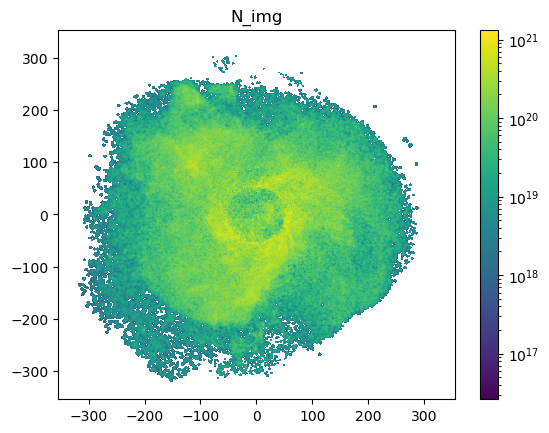

In [12]:
plt.hist2d(x2, y2, weights = f , bins = [numrays_2,numrays_2], norm = 'log')
plt.colorbar()
plt.title('N_img')

In [ ]:
# plot number intercepted
fig, ax = plt.subplots()

h = ax.hist2d(x, y, weights = intercepted, bins = [numrays, numrays], norm=matplotlib.colors.LogNorm())
ax.axis('equal')
ax.set_xlabel('kpc')
ax.set_ylabel('kpc')
fig.colorbar(h[3], label = 'expected number of cloudlets incercepted')

plt.show()

In [5]:
if data_type == 'alpha':
    rot0_1 = np.sqrt(rot0_1)
    rot0_2 = np.sqrt(rot0_2)
    rot90_1 = np.sqrt(rot90_1)
    rot90_2 = np.sqrt(rot90_2)

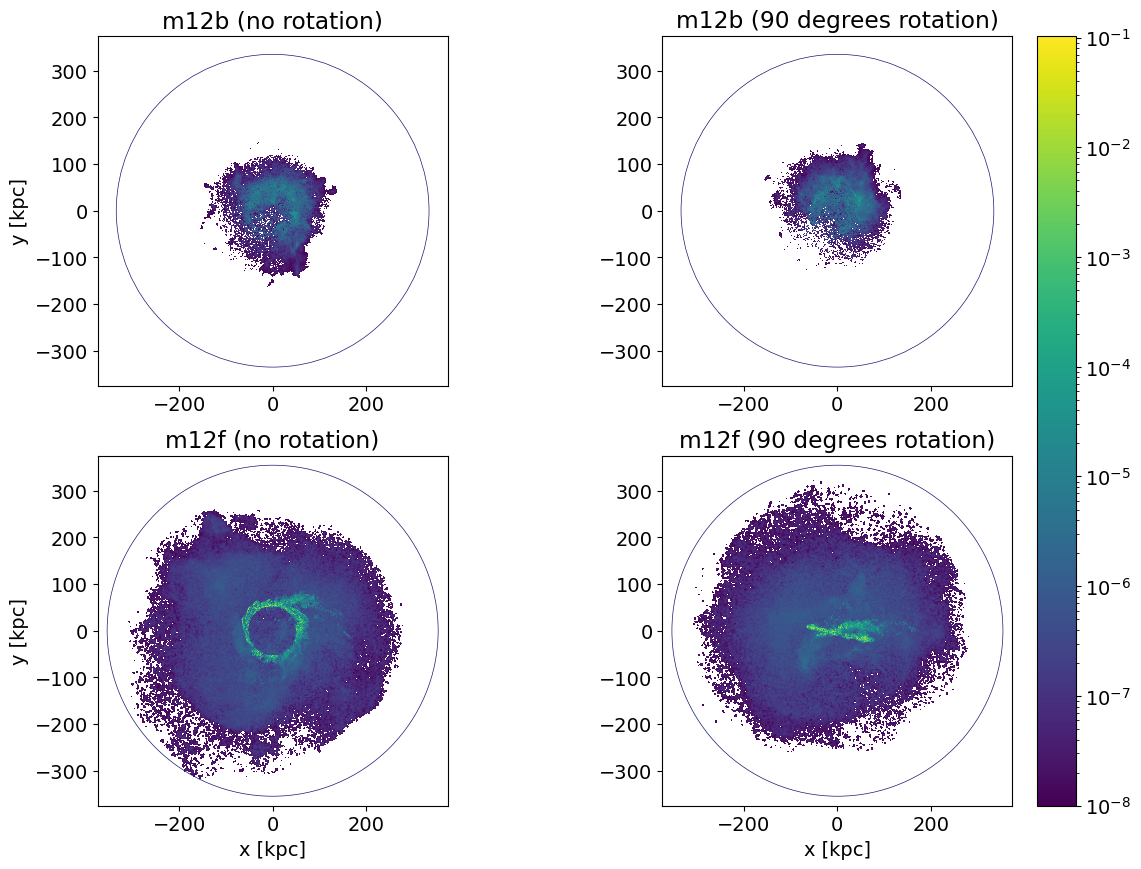

In [9]:
# plot scattering angle or time
import matplotlib.patches as patches

plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

global_min = 1e-8#min(rot0_1[rot0_1 > 0].min(), rot0_2[rot0_2 > 0].min(), rot90_1[rot90_1 > 0].min(), rot90_2[rot90_2 > 0].min())
global_max = max(rot0_1.max(), rot0_2.max(), rot90_1.max(), rot90_2.max())
shared_norm = matplotlib.colors.LogNorm(vmin=global_min, vmax=global_max)

circle1 = patches.Circle((0, 0), r1, edgecolor='r', facecolor='None', linewidth=0.5)
circle2 = patches.Circle((0, 0), r2, edgecolor='r', facecolor='None', linewidth=0.5)

im1 = ax[0, 0].hist2d(x1, y1, weights = rot0_1, bins = [numrays_1,numrays_1], norm=shared_norm, cmin = 1e-8)
ax[0, 1].hist2d(x1, y1, weights = rot90_1, bins = [numrays_1,numrays_1], norm=shared_norm, cmin = 1e-8)
im2 = ax[1, 0].hist2d(x2, y2, weights = rot0_2, bins = [numrays_2,numrays_2], norm=shared_norm, cmin = 1e-8)
ax[1, 1].hist2d(x2, y2, weights = rot90_2, bins = [numrays_2,numrays_2], norm=shared_norm, cmin = 1e-8)

ax[0,0].add_patch(patches.Circle((0, 0), r1, edgecolor='midnightblue', facecolor='None', linewidth=0.5))
ax[0,1].add_patch(patches.Circle((0, 0), r1, edgecolor='midnightblue', facecolor='None', linewidth=0.5))
ax[1,0].add_patch(patches.Circle((0, 0), r2, edgecolor='midnightblue', facecolor='None', linewidth=0.5))
ax[1,1].add_patch(patches.Circle((0, 0), r2, edgecolor='midnightblue', facecolor='None', linewidth=0.5))

ax[0, 0].set_aspect('equal')
ax[0, 1].set_aspect('equal')
ax[1, 0].set_aspect('equal')
ax[1, 1].set_aspect('equal')

ax[0, 0].set_ylabel('y [kpc]')
ax[1, 0].set_xlabel('x [kpc]')
ax[1, 0].set_ylabel('y [kpc]')
ax[1, 1].set_xlabel('x [kpc]')

ax[0,0].set_title('m12b (no rotation)')
ax[0,1].set_title('m12b (90 degrees rotation)')
ax[1,0].set_title('m12f (no rotation)')
ax[1,1].set_title('m12f (90 degrees rotation)')

for x in ax.flatten():
    x.set_xlim(-375, 375)
    x.set_ylim(-375, 375)


fig.colorbar(im2[3], ax=ax[:, 1], orientation='vertical')

plt.savefig(f'../outputs/scattering_angle', dpi = 300)
# plt.show()

In [12]:
len(rot0_1)

450241

In [21]:
len(rot0_2[rot0_2 > 1e-2])/(numrays_2**2)

7.934933544931561e-05

In [ ]:
# plot scattering time

fig, ax = plt.subplots()

h = ax.hist2d(x, y, weights = (tau.cgs).value, bins = [numrays,numrays], norm=matplotlib.colors.LogNorm(vmax = 1e-3))
ax.axis('equal')
ax.set_xlabel('x (kpc)')
ax.set_ylabel('y (kpc)')
fig.colorbar(h[3], label = 'scattering time (s)')

plt.savefig('outputs/m12f_res7100/scattering_time', dpi = 300)
plt.show()

Text(0, 0.5, 'number of sightlines')

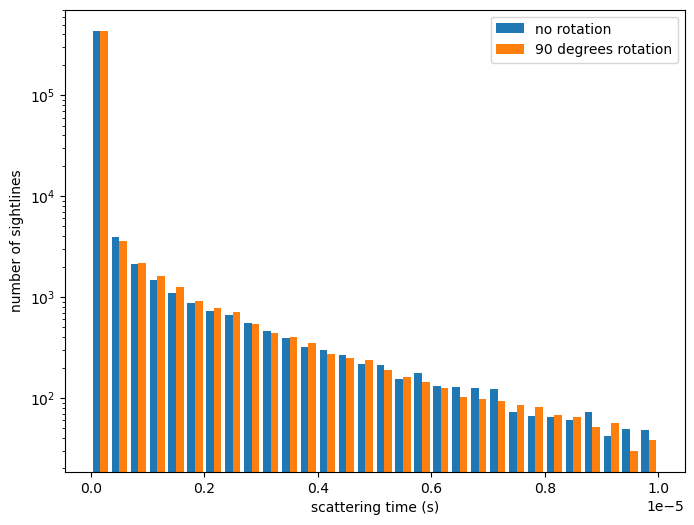

In [ ]:
# distribution of scattering times

plt.figure(figsize=(8, 6))

plt.hist([rot0, rot90], bins = 30, label=['no rotation', '90 degrees rotation'], log = True, range = [0, 1e-5])
plt.legend(loc='upper right')
plt.xlabel('scattering time (s)')
plt.ylabel('number of sightlines')

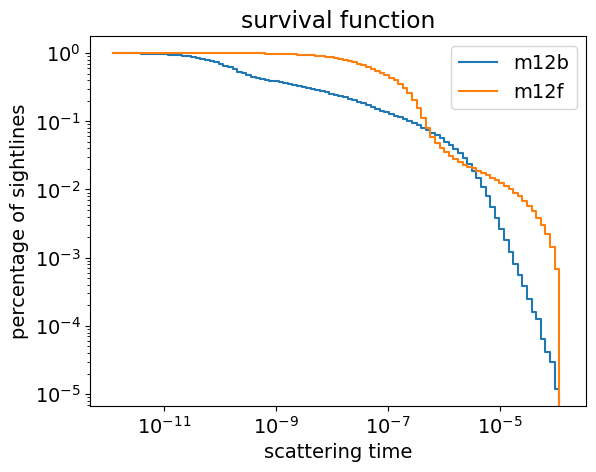

In [ ]:
bins = np.logspace(-12, np.log10(np.max(rot0_1)), 100)

hist, bin_edges = np.histogram(rot0_1, bins=bins)
cumulative_hist = np.cumsum(hist)/np.max(np.cumsum(hist))

hist2, bin_edges2 = np.histogram(rot0_2, bins=bins)
cumulative_hist2 = np.cumsum(hist2)/np.max(np.cumsum(hist2))

plt.step(bin_edges[1:], 1- cumulative_hist, where='pre', label = 'm12b')
plt.step(bin_edges[1:], 1 - cumulative_hist2, where='pre', label = 'm12f')
plt.title('survival function')
plt.xlabel('scattering time')
plt.ylabel('percentage of sightlines')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


In [24]:
imp_param_1 = np.sqrt(x1**2 + y1**2)
imp_param_2 = np.sqrt(x2**2 + y2**2)

mean = scipy.stats.binned_statistic(imp_param_1, rot0_1, statistic = 'mean', bins = 20)
std = scipy.stats.binned_statistic(imp_param_1, rot0_1, statistic = 'std', bins = 20).statistic

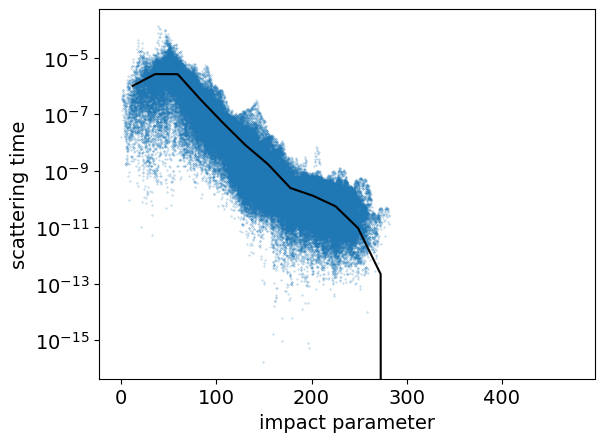

In [27]:
plt.scatter(imp_param_1, rot0_1, s = 0.1, alpha = 0.5)
plt.plot((mean.bin_edges[1:]+ mean.bin_edges[:-1])/2, mean.statistic, c = 'k')
# plt.errorbar((mean.bin_edges[1:]+ mean.bin_edges[:-1])/2, mean.statistic, yerr = std, fmt = 'o', c = 'k')

# plt.plot(imp_param_2, rot0_2)

plt.xlabel('impact parameter')
plt.ylabel('scattering time')
plt.yscale('log')

In [17]:
np.sqrt(len(rot0_1))

np.float64(671.0)

In [ ]:
a1 = np.reshape(rot0_1, (671, 671))


671

Text(0, 0.5, 'scattering time')

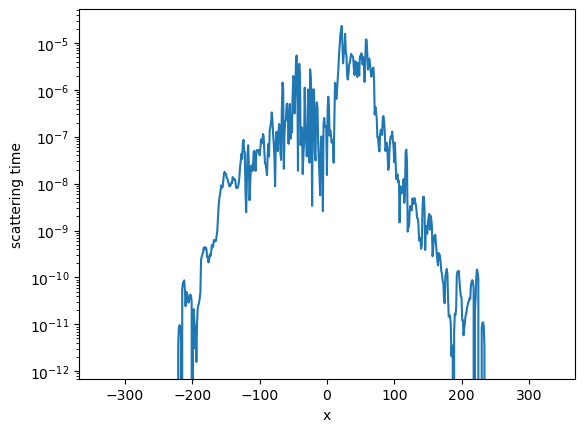

In [31]:
plt.plot(np.arange(-r1,r1, 1), a1[335])
plt.yscale('log')

plt.xlabel('x')
plt.ylabel('scattering time')

In [27]:
np.mean(rot0_1)

np.float64(9.975663499145097e-08)

In [29]:
np.mean(rot90_1)

np.float64(9.97682853268577e-08)

In [28]:
np.mean(rot0_2)

np.float64(5.368204816779154e-06)

In [ ]:
# why is filling fraction small in some cells?
# exclude if number of cloudlets intercepted is less than 1
# histogram of scattering time vs radius
# survivorship funciton
# something with different star formation rate